# From raw measurements to compressed sensing measurements
    Now we have generated raw FLIM measurements from generate_raw_measurement, we can use the raw measurements to simulate the compressively sensed measurements.

## Some preparation

In [29]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from utilities import draw
import h5py

A function to read in raw_measurement files into the memory

In [2]:
# This function reads the raw measurements data from the Raw_Measurements file
# Parameters:
# - starting_index is where the index starts
# - batch is the number of batches
# For example, read_raw_data(20,10) will return the raw measurement data from sample_20 to sample_30
# There are up to 8000 raw measurements data
def read_raw_data(starting_index, batch):
    raw_measurements = np.zeros([batch,128,128,256]).astype(np.uint8)
    for j in range(batch):
        i = j+starting_index
        raw_measurements[j,:,:] = scipy.io.loadmat('Data\Raw_Measurements\sample_'+str(i)+'.mat')['measurements']
    return raw_measurements

## Generate images
Compressive measurements are made by $y = \phi x$, where y is the compressively measured datasets, and x is the original image. $\phi$ is the measurement matrix
x in here is a 1D array, so we reshape the lifetime raw measurements into 

$x = [batch_i, t, y]$

So first of all we need a Hadamard Matrix, as our measurement matrix $\phi$
### Generate hadamard patterns

The shape of hadamard matrix is  (16384, 16384)


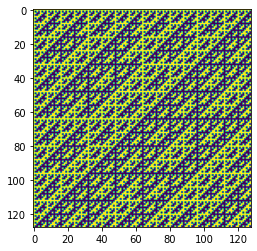

In [68]:
# raw_measurements = [batch_i, x, y, t]
hadamard= scipy.linalg.hadamard(16384)
print('The shape of hadamard matrix is ', hadamard.shape)
plt.imshow(hadamard[:128,:128])

In [75]:
# Get the hadamard order
with h5py.File('pattern_index_HR_128.mat','r') as f:
    hadamard_idx = np.squeeze((np.array(f['pat_idx'])-1).astype(int))
# Reorder hadamard according to the order
hadamard_ordered = hadamard[hadamard_idx,:]

### Read in raw measurements

In [79]:
raw_measurements = read_raw_data(0,1)
print('The shape of the raw measurements data is ',raw_measurements.shape)

The shape of the raw measurements data is  (1, 128, 128, 256)


Rearrange measurements of 128*128 into 1D pixel arrays of 16384 to be hadamard transformed

In [80]:
# raw_measurements = [batch_i,x,y,t]
x_2D = np.moveaxis(raw_measurements,[1,2,3],[2,3,1])
# x_2D = [batch_1,t,x,y]
x = np.reshape(x_2D, (x_2D.shape[0],x_2D.shape[1],-1))
print('The shape of 1D measurements x is ', x.shape)

The shape of 1D measurements x is  (1, 256, 16384)


In [ ]:
CS_measurements = np.dot(x,hadamard.T)